# Diabetes Prediction using classification method 

### Import Libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Load Datasets

In [85]:
data = pd.read_csv("diabetes.csv")

### Shape of Data

In [86]:
data.shape

(768, 9)

### First 8 Rows of Data

In [87]:
data.head(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


## Last 7 Rows of Data

In [88]:
data.tail(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [89]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [92]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Checking Null Values

In [93]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Diabetes Distribution

Outcome
1    268
0    500
Name: count, dtype: int64
Outcome
1    34.895833%
0    65.104167%
Name: proportion, dtype: object



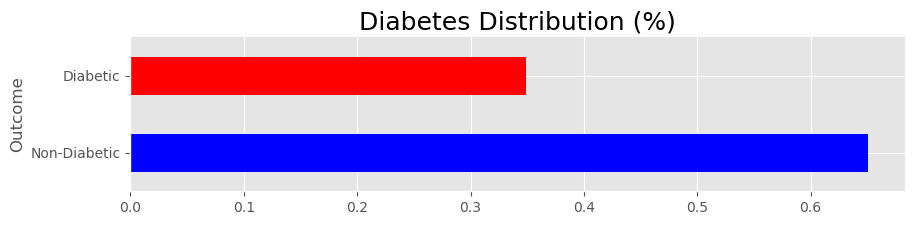

In [94]:
#Finding Class Distribution Percentage
print(data['Outcome'].value_counts(ascending=True))
print(data['Outcome'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
# Plot the bar chart
data['Outcome'].value_counts(normalize=True).plot(kind='barh',figsize=(10, 2), color=['blue', 'red']).spines[['top', 'right']].set_visible(False)
plt.title('Diabetes Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()

### Exploratory Data Analysis

In [95]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Correlation Matrix

<Axes: >

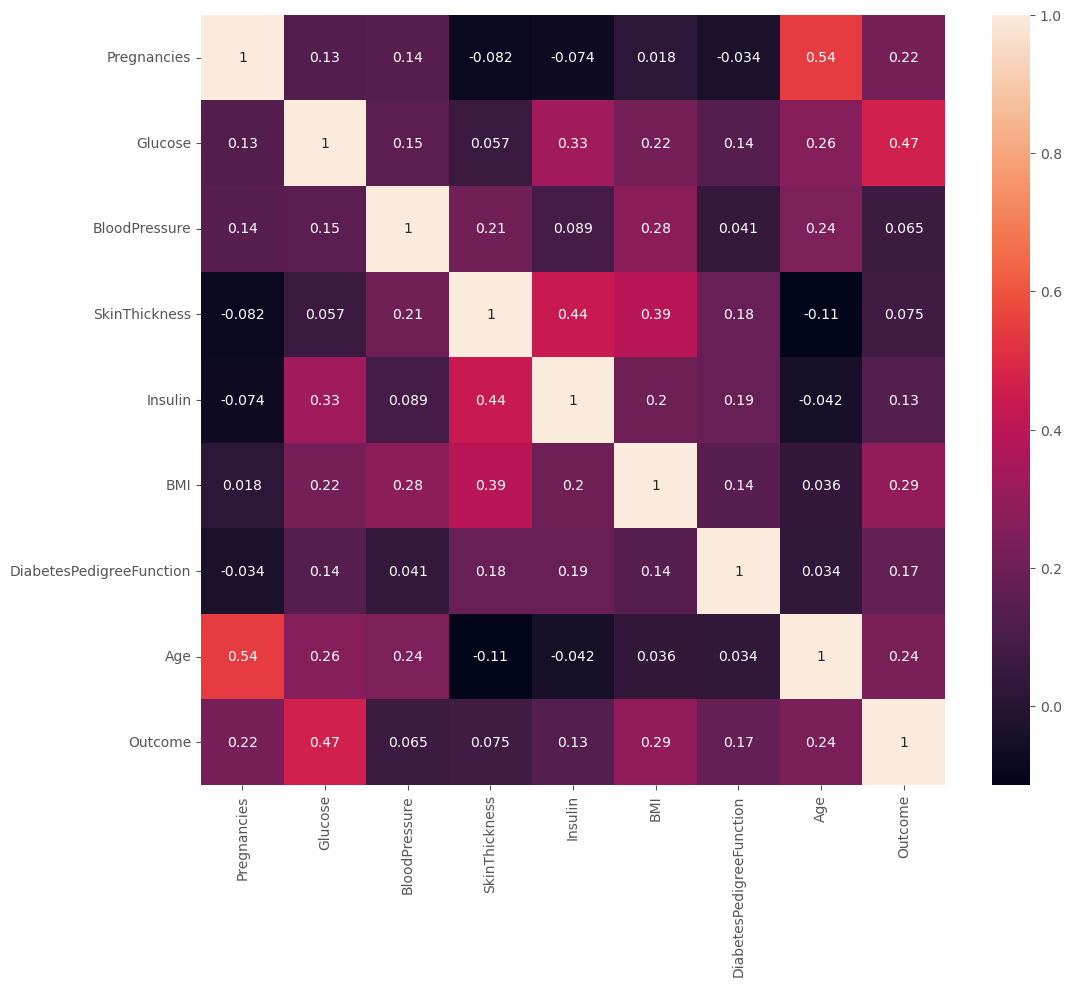

In [96]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

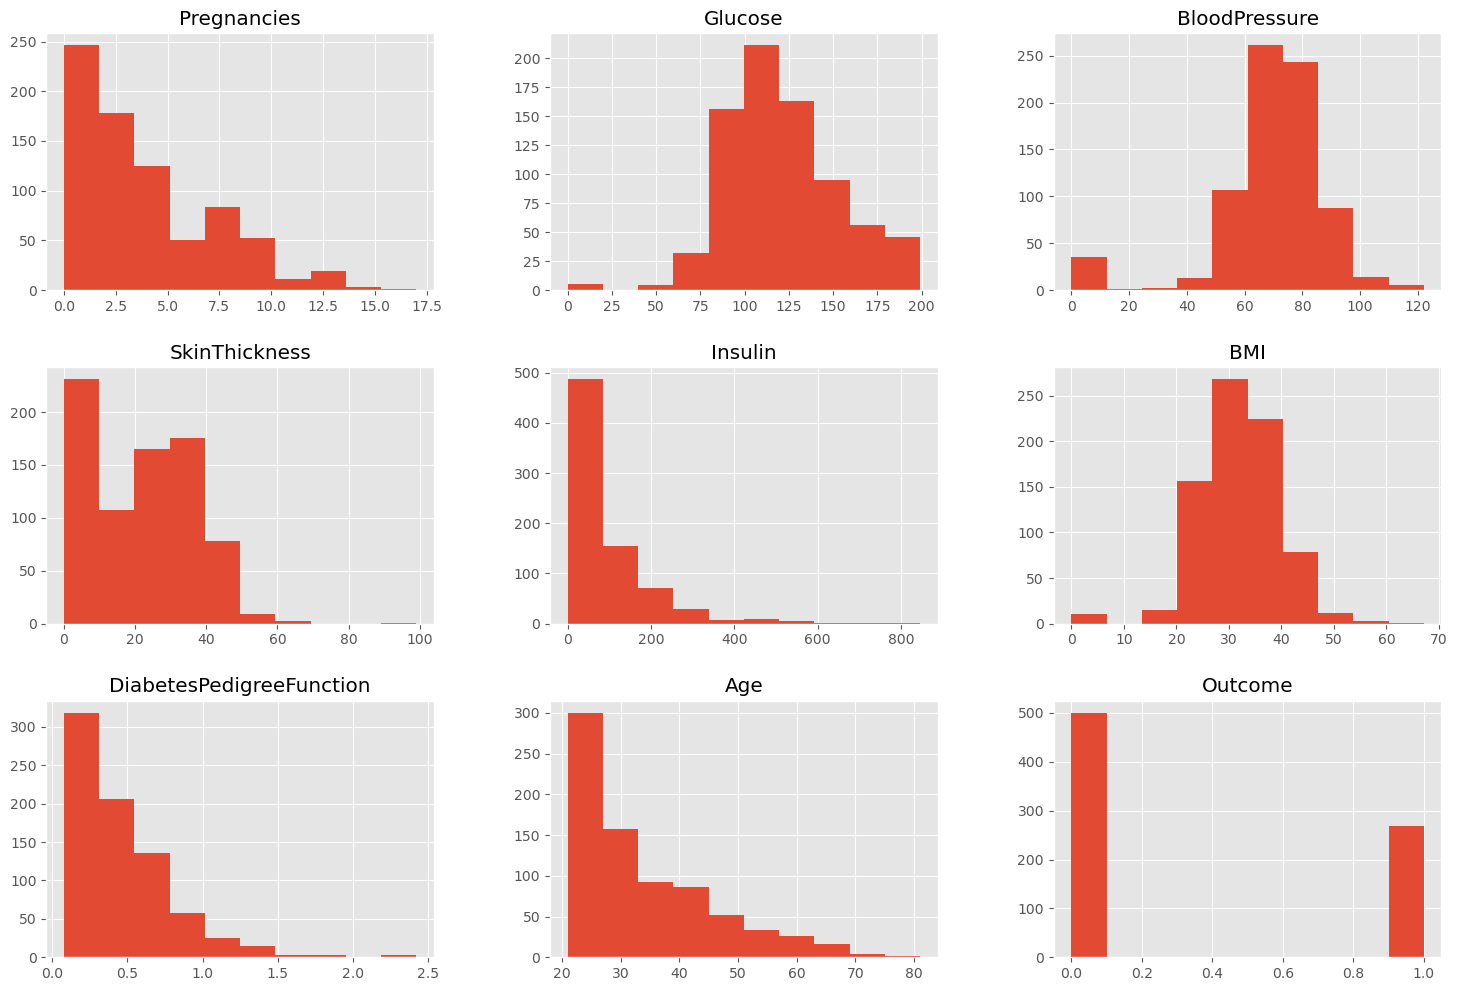

In [97]:
data.hist(figsize=(18,12))
plt.show()

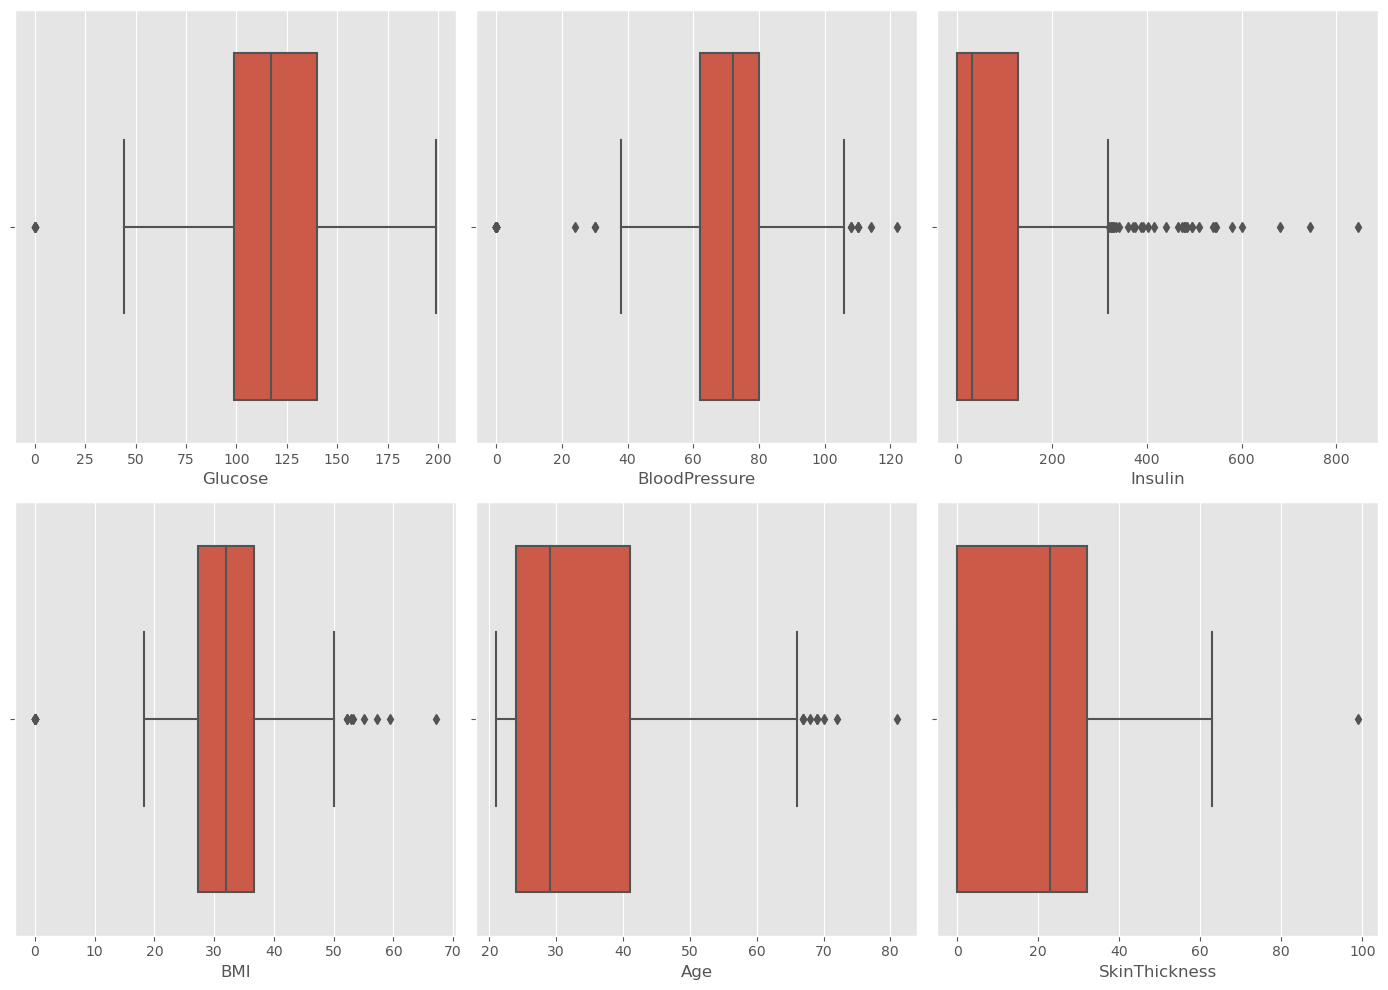

In [98]:
features = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'SkinThickness']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=feature, data=data)

plt.tight_layout()
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


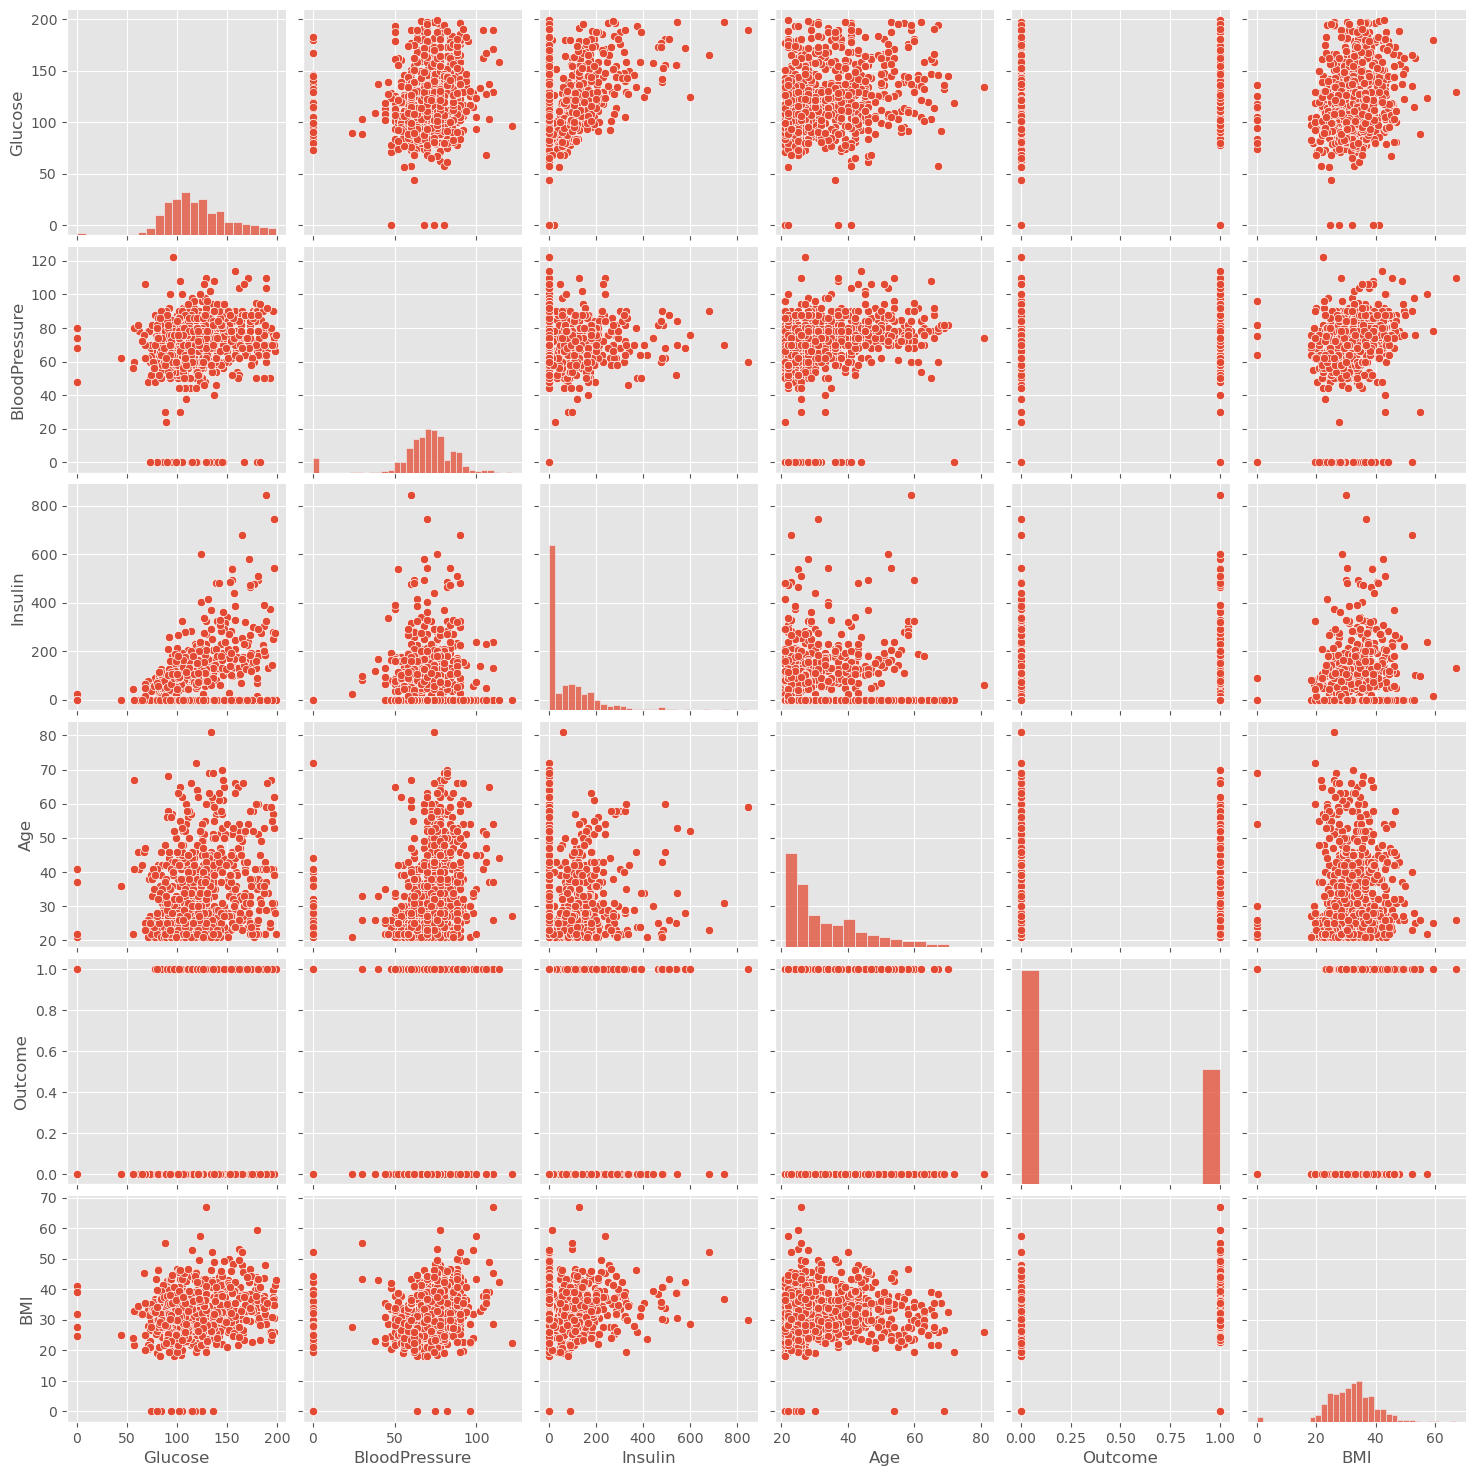

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
mean_col = ['Glucose', 'BloodPressure', 'Insulin', 'Age', 'Outcome', 'BMI']
sns.pairplot(data[mean_col])
plt.show()

<Axes: xlabel='Outcome', ylabel='Insulin'>

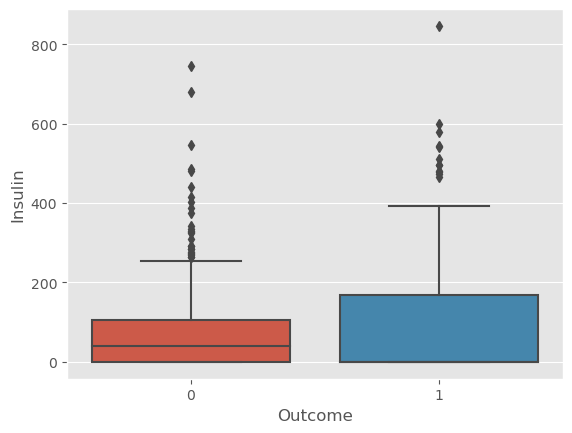

In [100]:
sns.boxplot(x='Outcome',y='Insulin',data=data)

<Axes: xlabel='BMI', ylabel='Glucose'>

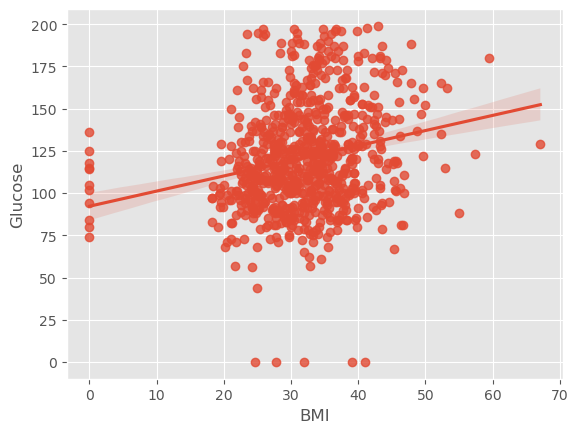

In [101]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


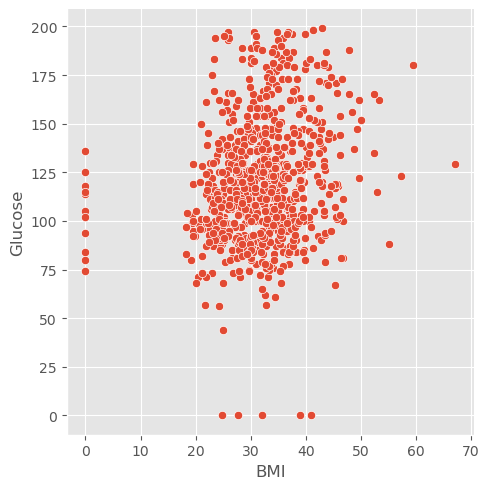

In [102]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

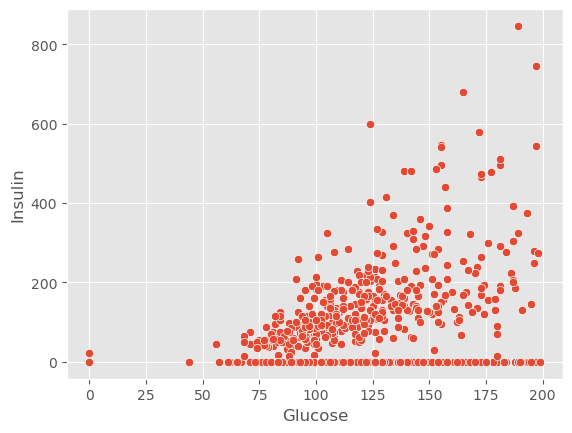

In [103]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

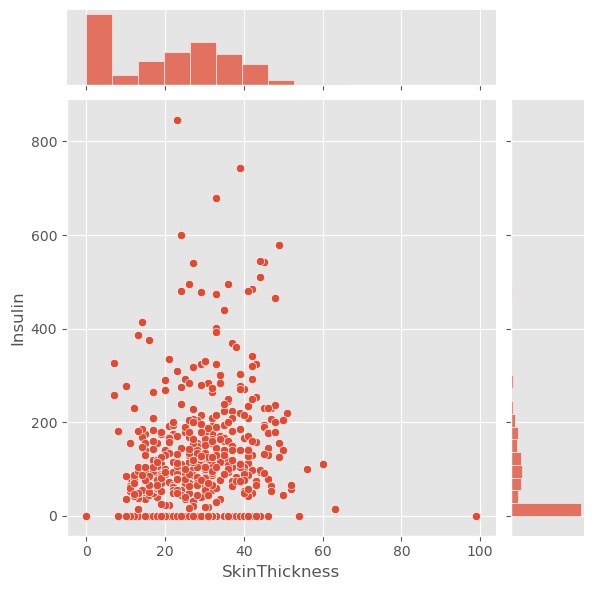

In [104]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


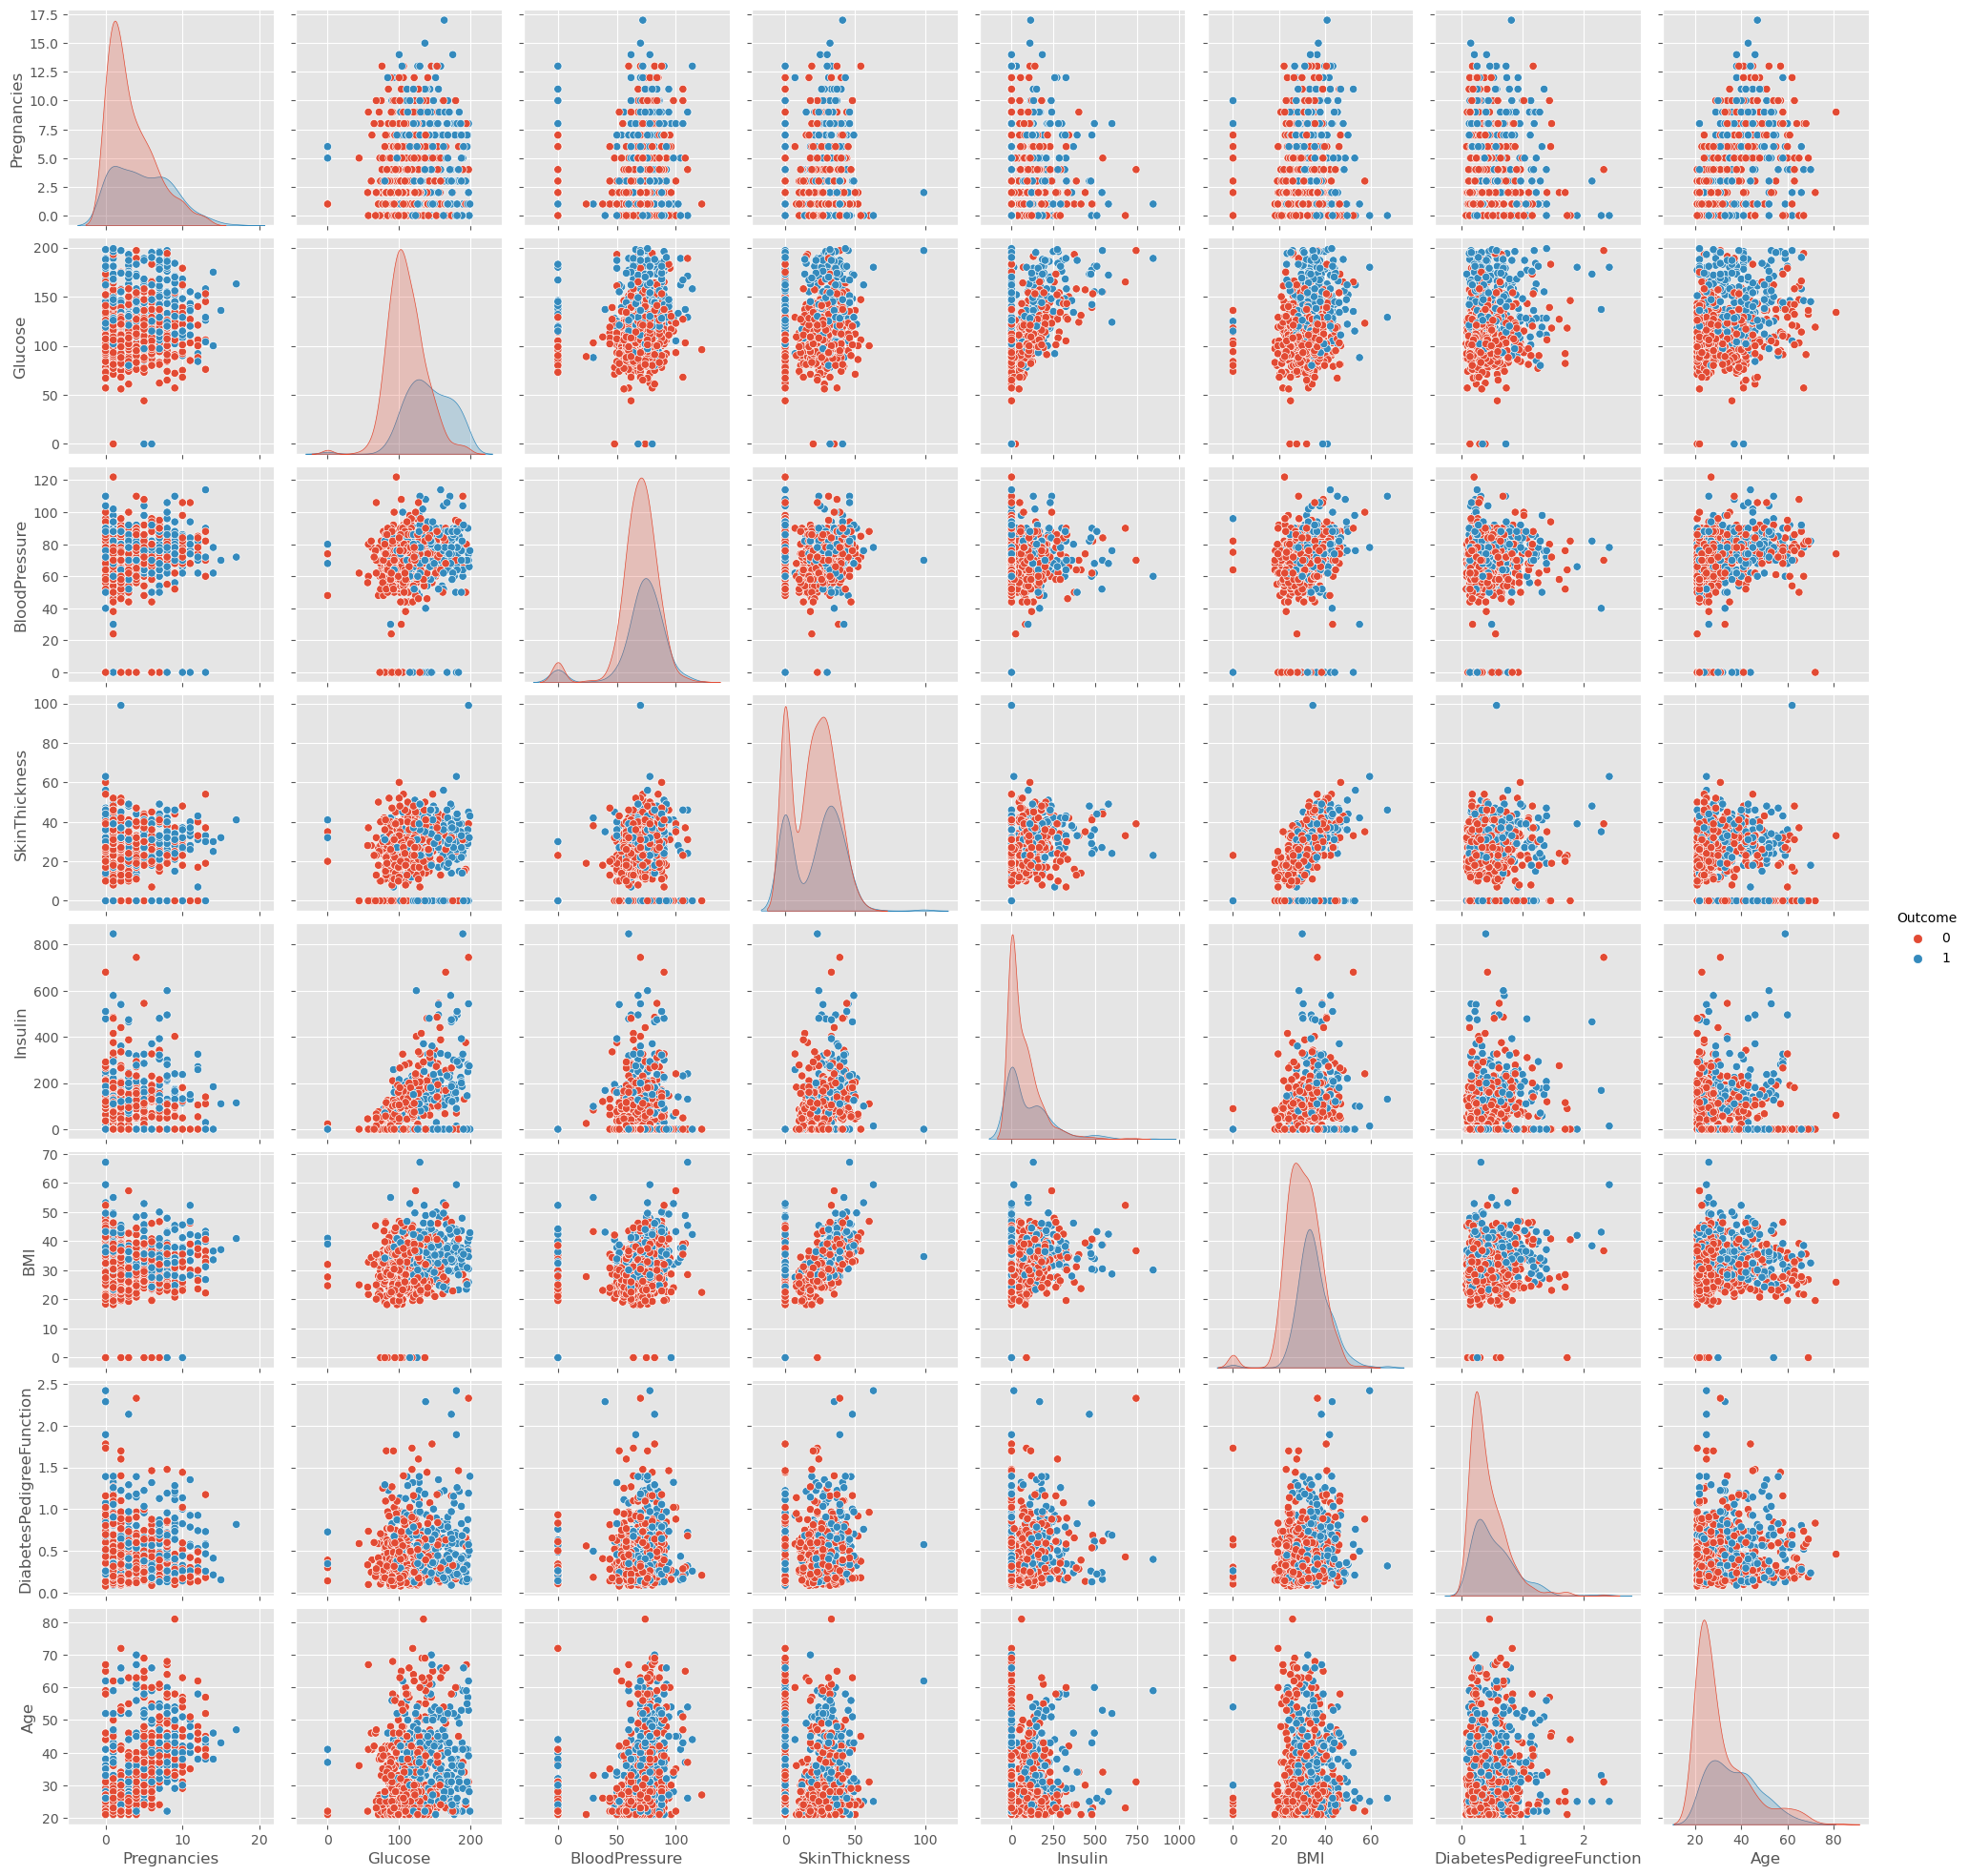

In [105]:
sns.pairplot(data,hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

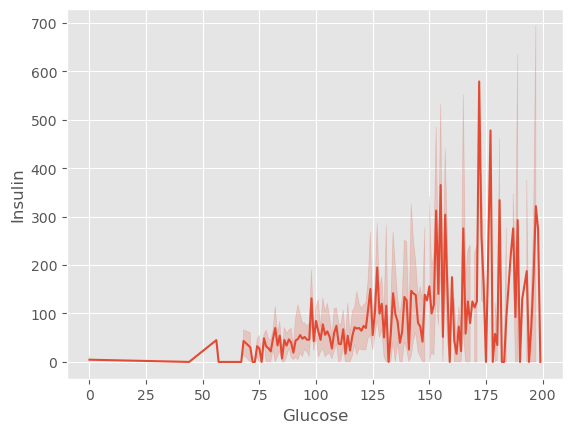

In [106]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

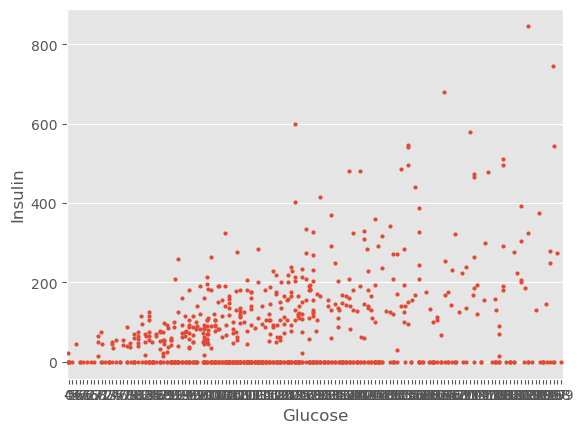

In [107]:
sns.stripplot(x='Glucose', y='Insulin', data=data, jitter=True, size=3)

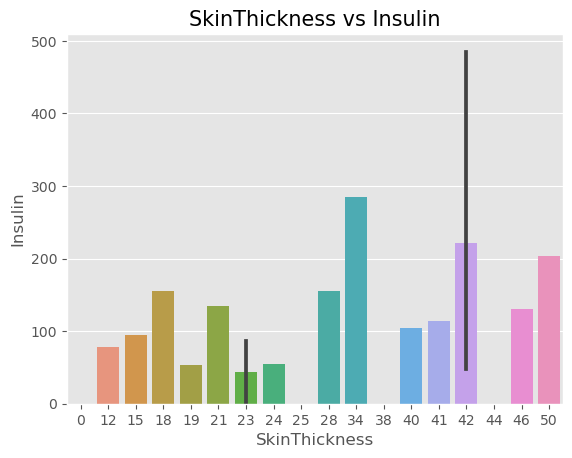

In [108]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[150:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

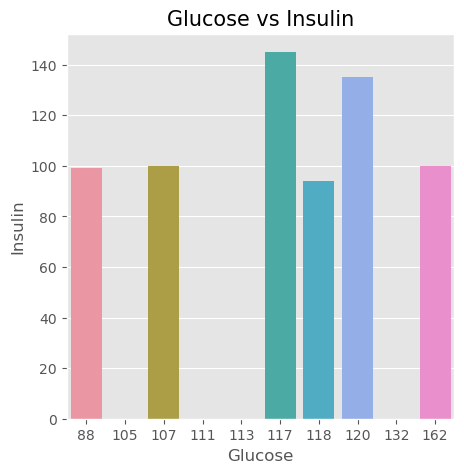

In [109]:
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[120:130])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

## Pre-process,Training and Testing Data

In [123]:
x = data.drop(columns = 'Outcome')

y = data['Outcome']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Train the Neural Network model

In [124]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, activation='relu', solver='adam', random_state=42)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

### MODELS

**1. Logistic Regression**

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

[[121  30]
 [ 30  50]]
Logistic Regression accuracy is: 74.03%


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**2. SVM**

In [126]:
from sklearn.svm import SVC  # Correct import statement
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVMAcc = accuracy_score(y_test, y_pred)
print('SVM accuracy is: {:.2f}%'.format(SVMAcc * 100))


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231

[[131  20]
 [ 41  39]]
SVM accuracy is: 73.59%


**3. Decison Tree**

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

DTAcc = accuracy_score(y_test, y_pred)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc * 100))


              precision    recall  f1-score   support

           0       0.79      0.71      0.75       151
           1       0.54      0.64      0.58        80

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.69       231

[[107  44]
 [ 29  51]]
Decision Tree accuracy is: 68.40%


### Compare Models

In [128]:
compare = pd.DataFrame({'Models Trained': ['Logistic Regression', 'SVM', 'Decision Tree'],
                        'Accuracy': [LRAcc*100, SVMAcc*100, DTAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Models Trained,Accuracy
0,Logistic Regression,74.025974
1,SVM,73.593074
2,Decision Tree,68.398268


### Plotting Model Comparison

<Axes: xlabel='Models Trained'>

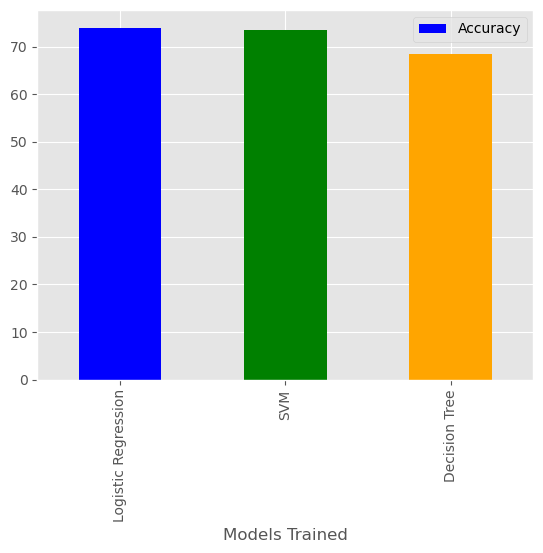

In [130]:
compare.plot(x='Models Trained', y='Accuracy', kind='bar', color=['blue', 'green', 'orange'])


**From the comparison plot, among the 3 Machine Learning Models, Logistic Regression had achieved the highest accuracy of 74.025974%.**